In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# To keep the randomization constant, adding some special number :)
np.random.seed(23232323)

# Creating the first dataset that is linearly seperable with 2 classes
# Classes have the means [2, 2] and [6, 6] with covariance matrix [[1, 0], [0, 1]]
mean_class_0_D1 = [2, 2]
cov_class_0_D1 = [[1, 0], [0, 1]]
class_0_D1 = np.random.multivariate_normal(mean_class_0_D1, cov_class_0_D1, 100)

mean_class_1_D1 = [6, 6]
cov_class_1_D1 = [[1, 0], [0, 1]]
class_1_D1 = np.random.multivariate_normal(mean_class_1_D1, cov_class_1_D1, 100)

In [3]:
# Creating the second dataset that is not linearly seperable again with 2 classes
# Classes have the means [3, 3] and [4, 4] with covariance matrix [[1, 0], [0, 1]]
mean_class_0_D2 = [3, 3]
cov_class_0_D2 = [[1, 0], [0, 1]]
class_0_D2 = np.random.multivariate_normal(mean_class_0_D2, cov_class_0_D2, 100)

mean_class_1_D2 = [4, 4]
cov_class_1_D2 = [[1, 0], [0, 1]]
class_1_D2 = np.random.multivariate_normal(mean_class_1_D2, cov_class_1_D2, 100)

In [4]:
# Adding ones and zeros to different classes to be able to use them in further calculations
# Here, D1 and D2 are the datasets that are created above
class_0_D1 = np.hstack((class_0_D1, np.zeros((100, 1))))
class_1_D1 = np.hstack((class_1_D1, np.ones((100, 1))))
D1 = np.vstack((class_0_D1, class_1_D1))

class_0_D2 = np.hstack((class_0_D2, np.zeros((100, 1))))
class_1_D2 = np.hstack((class_1_D2, np.ones((100, 1))))
D2 = np.vstack((class_0_D2, class_1_D2))

In [5]:
# Below, I used a trick to split the dataset into train and test sets using stratify parameter
# This parameter is used to keep the ratio of classes in the train and test sets
# I used 0.1 as the test size, so 10% of the data will be used for testing
# This means 10 vectors from each class will be used for testing as requested
train_D1, test_D1 = train_test_split(D1, test_size=0.1, stratify=D1[:, 2])
train_D2, test_D2 = train_test_split(D2, test_size=0.1, stratify=D2[:, 2])

# Here I split the train and test sets into X and y where X is the features and y is the class labels
X_train_D1, y_train_D1 = train_D1[:, :2], train_D1[:, 2]
X_test_D1, y_test_D1 = test_D1[:, :2], test_D1[:, 2]

X_train_D2, y_train_D2 = train_D2[:, :2], train_D2[:, 2]
X_test_D2, y_test_D2 = test_D2[:, :2], test_D2[:, 2]

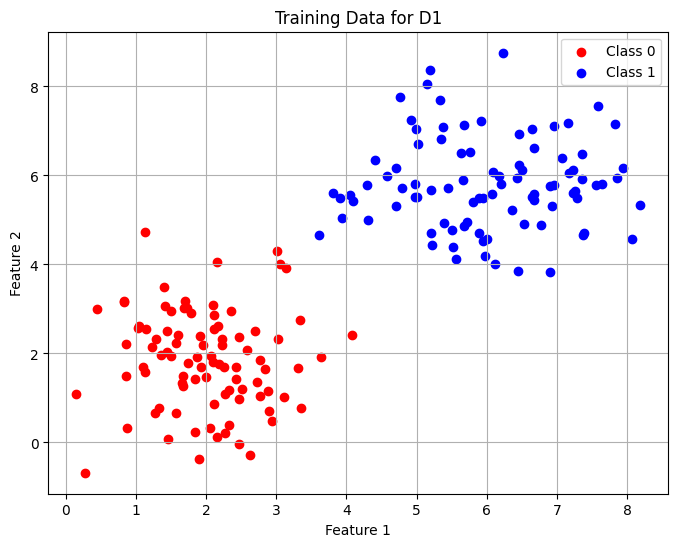

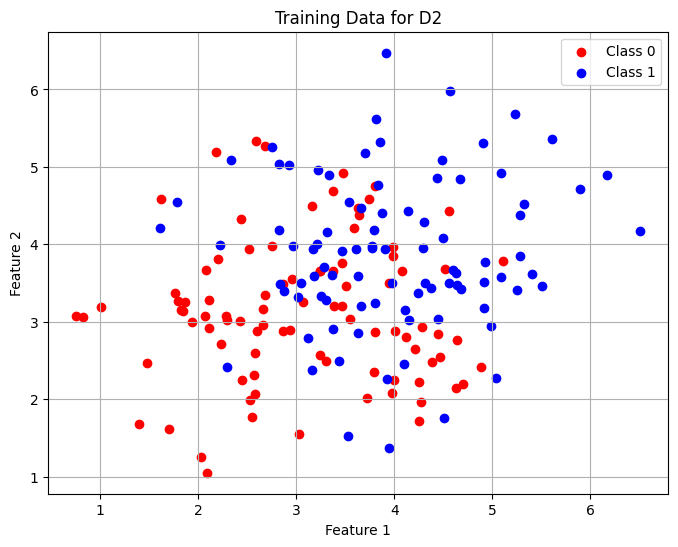

In [6]:
# Ploting D1 training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_D1[y_train_D1 == 0][:, 0], X_train_D1[y_train_D1 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train_D1[y_train_D1 == 1][:, 0], X_train_D1[y_train_D1 == 1][:, 1], color='blue', label='Class 1')
plt.title('Training Data for D1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Ploting D2 training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_D2[y_train_D2 == 0][:, 0], X_train_D2[y_train_D2 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train_D2[y_train_D2 == 1][:, 0], X_train_D2[y_train_D2 == 1][:, 1], color='blue', label='Class 1')
plt.title('Training Data for D2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Hard-margin SVM
# As kernel is automatically set to rbf, I set it to linear to use a linear kernel
# C is set to a very large number to make the SVM a hard-margin SVM
svm_hard = SVC(kernel = 'linear', C = 1e10)
svm_hard.fit(X_train_D1, y_train_D1)

# Predicting the classes of the training and test sets using the trained model
y_train_pred_D1 = svm_hard.predict(X_train_D1)
y_test_pred_D1 = svm_hard.predict(X_test_D1)

# Results
train_accuracy_D1 = accuracy_score(y_train_D1, y_train_pred_D1)
test_accuracy_D1 = accuracy_score(y_test_D1, y_test_pred_D1)

# Printing the results
print("Training Accuracy for D1 (Hard-Margin SVM):", train_accuracy_D1)
print("Test Accuracy for D1 (Hard-Margin SVM):", test_accuracy_D1)
print("Classification Report for Test Set T1:")
print(classification_report(y_test_D1, y_test_pred_D1))

Training Accuracy for D1 (Hard-Margin SVM): 1.0
Test Accuracy for D1 (Hard-Margin SVM): 1.0
Classification Report for Test Set T1:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [9]:
# Soft-margin SVM
# Again, the kernel is set to linear
# C is chosen as 1.0 to allow some misclassification as it is a soft-margin SVM
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_train_D2, y_train_D2)

# Predicting the classes of the training and test sets using the trained model
y_train_pred_D2 = svm_soft.predict(X_train_D2)
y_test_pred_D2 = svm_soft.predict(X_test_D2)

# Results
train_accuracy_D2 = accuracy_score(y_train_D2, y_train_pred_D2)
test_accuracy_D2 = accuracy_score(y_test_D2, y_test_pred_D2)

# Printing the results
print("Training Accuracy for D2 (Soft-Margin SVM):", train_accuracy_D2)
print("Test Accuracy for D2 (Soft-Margin SVM):", test_accuracy_D2)
print("Classification Report for Test Set T2:")
print(classification_report(y_test_D2, y_test_pred_D2))

Training Accuracy for D2 (Soft-Margin SVM): 0.7388888888888889
Test Accuracy for D2 (Soft-Margin SVM): 0.85
Classification Report for Test Set T2:
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        10
         1.0       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
# MLP for D1, here the hidden layer sizes are set to (10, 10) to have 2 hidden layers with 10 and 5 neurons
mlp_D1 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=23232323)
mlp_D1.fit(X_train_D1, y_train_D1)

# Predict on training and test sets
y_train_pred_mlp_D1 = mlp_D1.predict(X_train_D1)
y_test_pred_mlp_D1 = mlp_D1.predict(X_test_D1)

# Results
train_accuracy_mlp_D1 = accuracy_score(y_train_D1, y_train_pred_mlp_D1)
test_accuracy_mlp_D1 = accuracy_score(y_test_D1, y_test_pred_mlp_D1)

print("Training Accuracy for D1 (MLP):", train_accuracy_mlp_D1)
print("Test Accuracy for D1 (MLP):", test_accuracy_mlp_D1)
print("Classification Report for Test Set T1 (MLP):")
print(classification_report(y_test_D1, y_test_pred_mlp_D1))

Training Accuracy for D1 (MLP): 1.0
Test Accuracy for D1 (MLP): 1.0
Classification Report for Test Set T1 (MLP):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
# MLP for D2, here the hidden layer sizes are set to (10, 10) to have 2 hidden layers with 10 and 5 neurons
mlp_D2 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=23232323)
mlp_D2.fit(X_train_D2, y_train_D2)

# Predict on training and test sets
y_train_pred_mlp_D2 = mlp_D2.predict(X_train_D2)
y_test_pred_mlp_D2 = mlp_D2.predict(X_test_D2)

# Results
train_accuracy_mlp_D2 = accuracy_score(y_train_D2, y_train_pred_mlp_D2)
test_accuracy_mlp_D2 = accuracy_score(y_test_D2, y_test_pred_mlp_D2)

print("Training Accuracy for D2 (MLP):", train_accuracy_mlp_D2)
print("Test Accuracy for D2 (MLP):", test_accuracy_mlp_D2)
print("Classification Report for Test Set T2 (MLP):")
print(classification_report(y_test_D2, y_test_pred_mlp_D2))

Training Accuracy for D2 (MLP): 0.7055555555555556
Test Accuracy for D2 (MLP): 0.8
Classification Report for Test Set T2 (MLP):
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        10
         1.0       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

